In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [9]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

 23306240/228813984 [==>...........................] - ETA: 36:02

KeyboardInterrupt: 

In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/roses/3713368809_eba7fa2fbf_m.jpg'),
 PosixPath('datasets/flower_photos/roses/14001990976_bd2da42dbc.jpg'),
 PosixPath('datasets/flower_photos/roses/685724528_6cd5cbe203.jpg'),
 PosixPath('datasets/flower_photos/roses/15190665092_5c1c37a066_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3208417632_19138d8e35_n.jpg')]

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/3713368809_eba7fa2fbf_m.jpg'),
 PosixPath('datasets/flower_photos/roses/14001990976_bd2da42dbc.jpg'),
 PosixPath('datasets/flower_photos/roses/685724528_6cd5cbe203.jpg'),
 PosixPath('datasets/flower_photos/roses/15190665092_5c1c37a066_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3208417632_19138d8e35_n.jpg')]

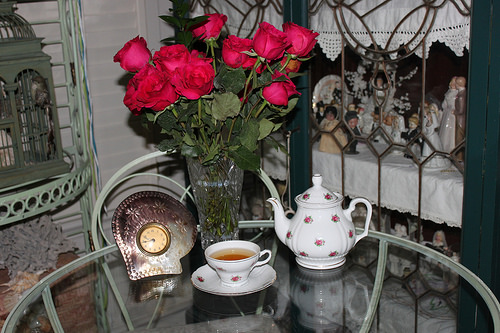

In [8]:
PIL.Image.open(str(roses[1]))


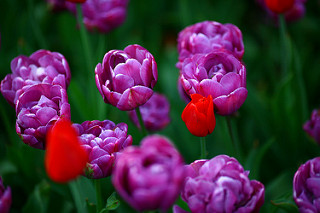

In [9]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [10]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [11]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [12]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/3713368809_eba7fa2fbf_m.jpg'),
 PosixPath('datasets/flower_photos/roses/14001990976_bd2da42dbc.jpg'),
 PosixPath('datasets/flower_photos/roses/685724528_6cd5cbe203.jpg'),
 PosixPath('datasets/flower_photos/roses/15190665092_5c1c37a066_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3208417632_19138d8e35_n.jpg')]

In [13]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/3713368809_eba7fa2fbf_m.jpg'

In [14]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [15]:
img.shape

(240, 238, 3)

In [16]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [8]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

NameError: name 'flowers_images_dict' is not defined

In [7]:
X = np.array(X)
y = np.array(y)

NameError: name 'X' is not defined

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

NameError: name 'X' is not defined

In [5]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

NameError: name 'X_train' is not defined

In [4]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

NameError: name 'X_train_scaled' is not defined

In [22]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 31ms/step - loss: 3.5825 - accuracy: 0.6198


[3.5824546813964844, 0.6198257207870483]

In [23]:
predictions = model.predict(X_test_scaled)
predictions


29/29 [==============================] - 1s 14ms/step


array([[  3.1215043 ,  35.668846  ,   2.6218216 , -35.965878  ,
         -3.4232275 ],
       [ 22.047617  , -13.648878  , -16.734343  , -19.218279  ,
         18.76004   ],
       [ -4.8253484 ,   0.8147484 ,   6.1814013 ,  -5.2485757 ,
         -3.7962852 ],
       ...,
       [  7.214536  ,  -9.07353   , -13.618552  ,  27.60722   ,
         -2.7449434 ],
       [ -2.6799855 ,   3.4590642 ,  -1.0865245 ,  -6.4455004 ,
          5.7495723 ],
       [  0.19437464, -18.206533  ,  -4.1519547 ,  20.130434  ,
          3.8511987 ]], dtype=float32)

In [24]:
score = tf.nn.softmax(predictions[0])

In [25]:
np.argmax(score)

1

In [26]:
y_test[0]

1

In [27]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(180,
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

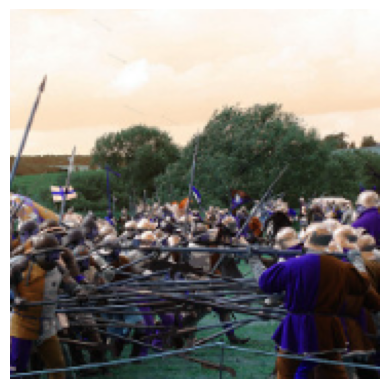

In [28]:
plt.axis('off')
plt.imshow(X[0])

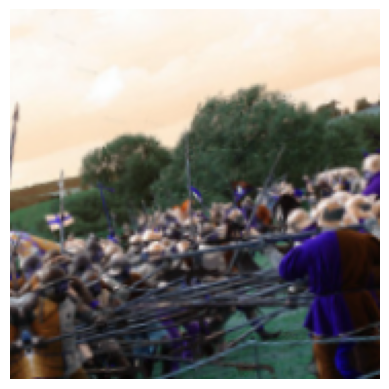

In [29]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))


In [2]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

NameError: name 'Sequential' is not defined

In [31]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 11ms/step - loss: 0.9359 - accuracy: 0.7298


[0.9359335899353027, 0.7298474907875061]

In [48]:
from PIL import Image
    # Load the image and resize it to the desired dimensions
image_path = f'/content/aaaaa.jpg'
width, height = 180, 180
 # Replace with the dimensions required by your model

image = Image.open(image_path)
image = image.resize((width, height))
print(image.width)

# Convert the image to a NumPy array and normalize the pixel values (if necessary)
image_array = np.asarray(image)
image_array = image_array / 255.0  # Normalize the pixel values between 0 and 1

print(image_array.shape)
    # Reshape the image array to match the input shape of your model
image_array = image_array.reshape(1, width, height, 3)  # Assumes the input shape is (1, width, height, 3)



180
(180, 180, 3)


In [49]:

prediction=model.predict(image_array)
prediction

1/1 [==============================] - 0s 18ms/step


array([[  2.7071445,   4.137935 ,   1.0879372, -10.850227 ,   5.9918504]],
      dtype=float32)

In [50]:
core=tf.nn.softmax(prediction)
core

<tf.Tensor: shape=(1, 5), dtype=float32, numpy=
array([[3.1170914e-02, 1.3035691e-01, 6.1735762e-03, 4.0351338e-08,
        8.3229864e-01]], dtype=float32)>

In [51]:
np.argmax(core)

4

In [58]:
def imageToArray(imageName):
    # Load the image and resize it to the desired dimensions
    image_path = f"/content/aaaaa.jpg"
    width, height = 180, 180  # Replace with the dimensions required by your model

    image = Image.open(image_path)
    image = image.resize((width, height))
    print(image.width)

    # Convert the image to a NumPy array and normalize the pixel values (if necessary)
    image_array = np.asarray(image)
    image_array = image_array / 255.0  # Normalize the pixel values between 0 and 1

    print(image_array.shape)
    # Reshape the image array to match the input shape of your model
    image_array = image_array.reshape(1, width, height, 3)  # Assumes the input shape is (1, width, height, 3)

    return image_array

In [59]:
image_array = imageToArray('/content/aaaaa.jpg')

180
(180, 180, 3)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
model.predict('daisy.jpg')

NameError: name 'model' is not defined